In [1]:
# Assignment-1 of Pansetty Karthik (15110082)

In [2]:
import nltk
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
from urllib import request
import random

In [6]:
#Importing the Tom Sawyer text from the link given in the slides

url = "http://www.gutenberg.org/files/74/74-0.txt"

tom_sawyer = request.urlopen(url)
tom_sawyer_text = tom_sawyer.read().decode('utf-8')

In [7]:
#Tokenizing (Converting the text into tokens)
tokens = nltk.word_tokenize(tom_sawyer_text)

In [8]:
#Tokens
len_tokens = len(tokens)
print('The number of tokens are', len_tokens)

The number of tokens are 91299


In [9]:
#Types
len_types = len(set(tokens))
print('The number of types are', len_types,'(vocabulary length)')

The number of types are 9278 (vocabulary length)


In [10]:
#TTR Ratio
ttr_ratio = len_types/len_tokens
print('The TTR ratioo is', ttr_ratio)

The TTR ratioo is 0.10162214263025882


In [11]:
# Frequency Distribution of the words
fdist = nltk.FreqDist(tokens)

In [12]:
import operator
sorted_fdist  = sorted(dict(fdist).items(), key=operator.itemgetter(1),reverse=True)

In [13]:
#Getting word lengths and frequencies

word_lengths = []
frequencies=[]

for key,val in sorted_fdist:
    word_lengths.append(len(key))
    frequencies.append(val)

In [14]:
#Zipf's Law (Multiplying the frequency by the rank)

zipfs = []
for i in range(len(frequencies)):
    zipfs.append((i+1)*frequencies[i])

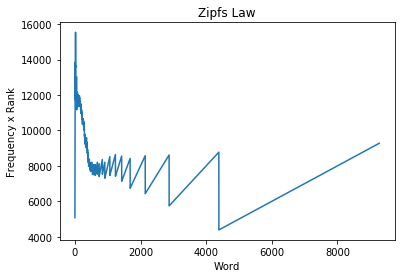

In [15]:
plt.plot(zipfs)
plt.xlabel('Word')
plt.ylabel('Frequency x Rank')
plt.title('Zipfs Law')
plt.show()

In [16]:
#Zipf's Other Law (Word length vs Frequency)

zipfs = []
for i in range(len(frequencies)):
    zipfs.append((word_lengths[i])*frequencies[i])

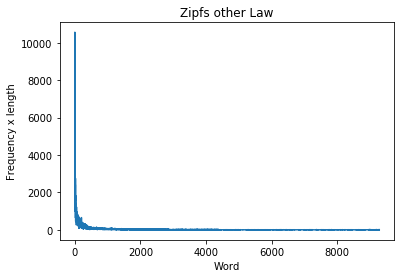

In [17]:
plt.plot(zipfs)
plt.xlabel('Word')
plt.ylabel('Frequency x length')
plt.title('Zipfs other Law')
plt.show()

In [18]:
#Heaps Law (Tokens vs Types)
x=[]
y=[]

i = 0
words = set()
for word in tokens:
    words.add(word)
    i += 1
    x.append(i)
    y.append(len(words))

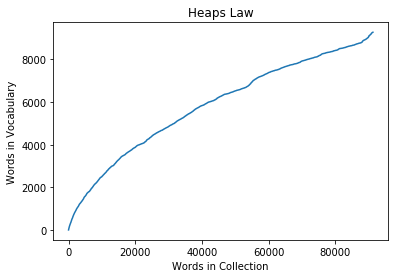

In [19]:
plt.plot(x,y)
plt.xlabel('Words in Collection')
plt.ylabel('Words in Vocabulary')
plt.title('Heaps Law')
plt.show()

In [20]:
x = np.array(x)
y = np.array(y)

In [21]:
sp.optimize.curve_fit(lambda t,k,beta: k*np.power(t,beta),  x,  y)

(array([13.5963577 ,  0.57041538]), array([[ 2.41088373e-04, -1.61572059e-06],
        [-1.61572059e-06,  1.08478868e-08]]))

In [ ]:
# So from here we got K = 13.5963577 and beta = 0.57041538. This is our desired local minima